# Compute ELF and RDG

In [1]:
import numpy as np
from qepy.driver import Driver
from qepy.io import QEInput

In [2]:
qe_options = {
    '&control': {
        'prefix' : "'tmp'",
        'outdir' : "'./'",
        'calculation': "'scf'",
        'pseudo_dir': "'./'"
    },
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'",
        'input_dft' : "'PBE'"
    },
    '&electrons': {
        'conv_thr' : 1e-8
    },
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al_ONCV_PBE-1.2.upf'],
    'k_points automatic': ['4 4 4 0 0 0'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

In [3]:
driver=Driver(qe_options=qe_options, logfile='tmp.out')

In [4]:
driver.electrons()

-137.91449178319868

## Start a new driver to load the results.

In [5]:
driver=Driver(prefix='tmp', outdir='./', logfile='tmp.out', task='nscf')

### Get electron localization function (ELF)

In [6]:
elf = driver.get_elf()

### Get reduced density gradient (RDG)

In [7]:
rdg = driver.get_rdg()

In [8]:
if driver.is_root :
    print(elf.max(), elf.min(), elf.sum())

0.8227654111345427 0.023904705142801717 3105.9248819321415


### Plot ELF and RDG

In [9]:
elf_3d = driver.data2field(elf)
rdg_3d = driver.data2field(rdg)

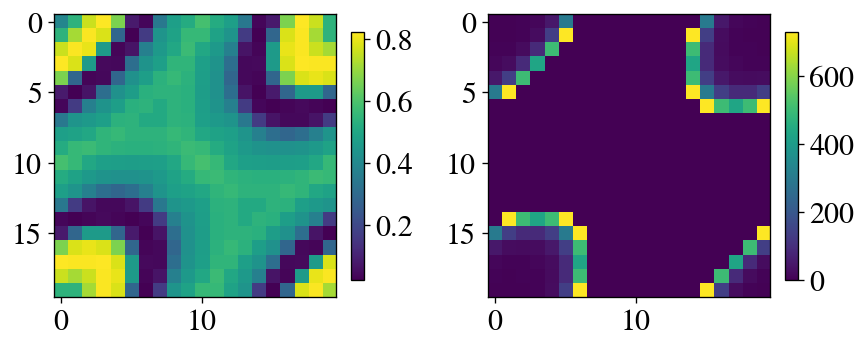

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

im=axs[0].imshow(elf_3d[0])
fig.colorbar(im, ax=axs[0], fraction=0.04)

im=axs[1].imshow(rdg_3d[0])
fig.colorbar(im, ax=axs[1], fraction=0.04)

plt.subplots_adjust(wspace=0.4)